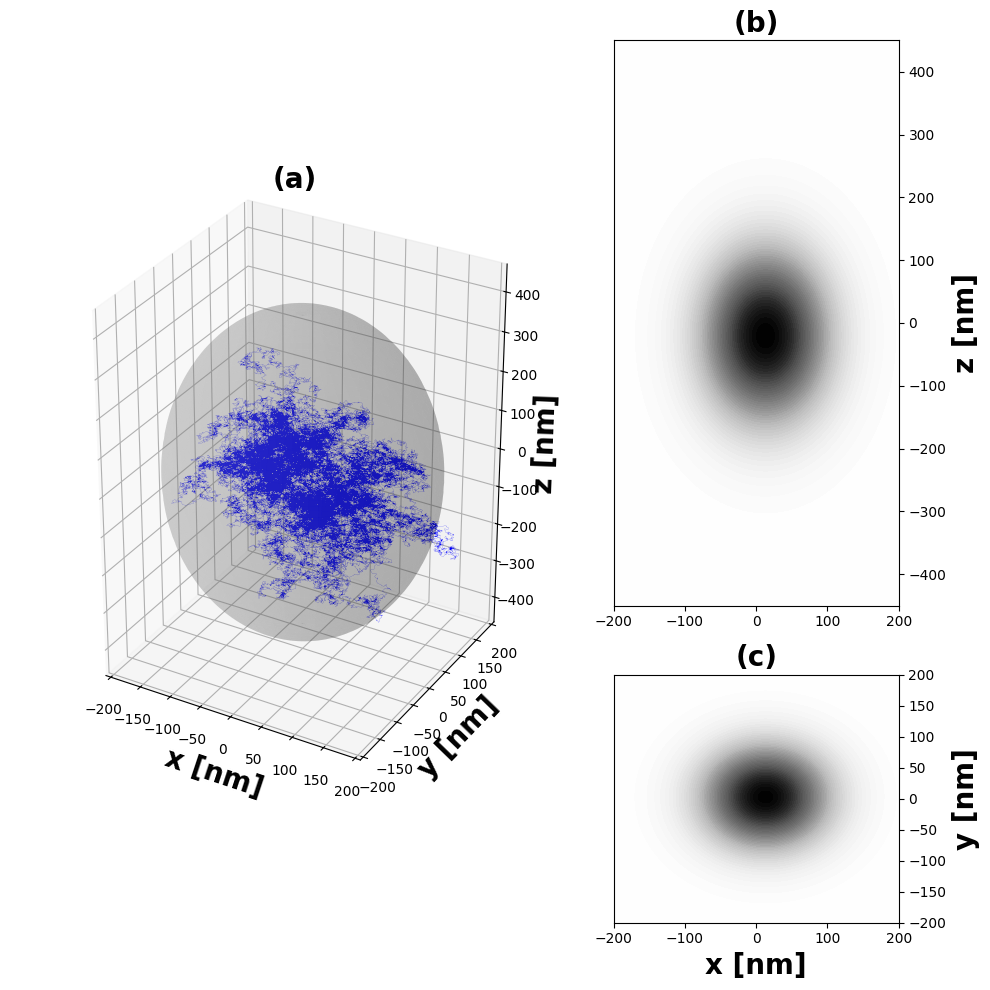

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

def trapped(N, Dt, x1, y1, z1, R, T, eta, kx, ky, kz):
    kB = 1.38e-23  # Boltzmann constant [J/K]
    gamma = 6 * np.pi * R * eta  # friction coefficient
    D = kB * T / gamma  # diffusion coefficient

    # np.random.seed(55)

    x = np.zeros(N)
    y = np.zeros(N)
    z = np.zeros(N)

    x[0], y[0], z[0] = x1, y1, z1  

    for i in range(1, N):
       
        x[i] = x[i - 1] - kx * Dt / gamma * x[i - 1]
        y[i] = y[i - 1] - ky * Dt / gamma * y[i - 1]
        z[i] = z[i - 1] - kz * Dt / gamma * z[i - 1]

       
        x[i] += np.sqrt(2 * D * Dt) * np.random.randn()
        y[i] += np.sqrt(2 * D * Dt) * np.random.randn()
        z[i] += np.sqrt(2 * D * Dt) * np.random.randn()

    t = np.arange(0, N * Dt, Dt)
    return x, y, z, t



# Define the parameters
N = 100000
kB = 1.38e-23 
Dt = 1e-5
x1 = y1 = z1 = 0
R = 1e-6
T = 300
eta = 0.001
kx = ky = 1e-6
kz = 0.2e-6


x, y, z, t = trapped(N, Dt, x1, y1, z1, R, T, eta, kx, ky, kz)

# Calculate standard deviations from equipartition theorem
sigma_x = np.sqrt(kB * T / kx)*10**(9)
sigma_y = np.sqrt(kB * T / ky)*10**(9)
sigma_z = np.sqrt(kB * T / kz)*10**(9)

scale_x = 200 / sigma_x
scale_y = 200 / sigma_y
scale_z = 400 / sigma_z


# Define the ellipsoid for the equiprobability surface
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
Xc = sigma_x * np.outer(np.cos(u), np.sin(v))
Yc = sigma_y * np.outer(np.sin(u), np.sin(v))
Zc = sigma_z * np.outer(np.ones(np.size(u)), np.cos(v))



# Scaling the ellipsoid coordinates
Xc_scaled = Xc * scale_x
Yc_scaled = Yc * scale_y
Zc_scaled = Zc * scale_z


fig = plt.figure(figsize=(10, 10))

# Creating a grid layout for subplots
gs = fig.add_gridspec(3, 2, width_ratios=[2, 1], height_ratios=[1, 1, 1])

# 3D trajectory plot
ax1 = fig.add_subplot(gs[:, 0], projection='3d')
ax1.plot(x*10**(9), y*10**(9), z*10**(9), color='blue', linewidth=0.1, alpha=1)
ax1.plot_surface(Xc_scaled, Yc_scaled, Zc_scaled, color='grey', alpha=0.2)
ax1.set_xlabel('x [nm]', fontsize = 20, fontweight= "bold")
ax1.set_ylabel('y [nm]', fontsize = 20, fontweight= "bold")
ax1.set_zlabel('z [nm]', fontsize = 20, fontweight= "bold")
ax1.set_xlim([-200, 200])
ax1.set_ylim([-200, 200])
ax1.set_zlim([-450, 450])
ax1.set_box_aspect([np.ptp(a) for a in [x, y, z]])  #
ax1.set_title("(a)", fontsize = 20, fontweight= "bold")



# Calculate the mean and standard deviation of the data
mean_x, std_x = norm.fit(x)
mean_y, std_y = norm.fit(y)
mean_z, std_z = norm.fit(z)

# Create a grid of (x, y) coordinates
x_grid = np.linspace(-250e-9, 250e-9, 200)
y_grid = np.linspace(-250e-9, 250e-9, 200)
z_grid = np.linspace(-450e-9, 450e-9, 200)

X, Y= np.meshgrid(x_grid, y_grid)
X, Z= np.meshgrid(x_grid, z_grid)

# Calculate the Gaussian distribution on this grid
X_Y = norm.pdf(X, mean_x, std_x) * norm.pdf(Y, mean_y, std_y)
X_Z = norm.pdf(X, mean_x, std_x) * norm.pdf(Z, mean_z, std_z)



ax2 = fig.add_subplot(gs[0:2, 1])
ax2.contourf(X*10**(9), Z*10**(9), X_Z,  levels=50, cmap='Greys')
ax2.yaxis.tick_right() 
ax2.yaxis.set_label_position("right")  
ax2.set_ylabel('z [nm]', fontsize = 20, fontweight= "bold")
ax2.set_xlim([-200, 200])
ax2.set_ylim([-450, 450])
ax2.set_title("(b)", fontsize = 20, fontweight= "bold")
ax2.set_aspect('auto')


ax3 = fig.add_subplot(gs[2, 1])
ax3.contourf(X*10**(9), Y*10**(9), X_Y,  levels=50, cmap='Greys')
ax3.set_xlabel('x [nm]', fontsize = 20, fontweight= "bold")
ax3.yaxis.tick_right()  
ax3.yaxis.set_label_position("right")  
ax3.set_ylabel('y [nm]', fontsize = 20, fontweight= "bold")
ax3.set_xlim([-200, 200])
ax3.set_ylim([-200, 200])
ax3.set_aspect('auto')
ax3.set_title("(c)", fontsize = 20, fontweight= "bold")




plt.tight_layout()

plt.show()


